In [1]:
import pickle
import sys
sys.path.append("../tools/")

import graphviz
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.grid_search import GridSearchCV


In [2]:
# load date and transform to dataframe 
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

# As soon as you print the data frame you see the'Total' 
# row is present from the spreadsheet and needs removed
data_dict.pop('TOTAL',0)

df = pd.DataFrame.from_dict(data_dict, orient = 'index')

df_filled = df.replace('NaN',0)
df_filled['email_address'] = df_filled['email_address'].replace(0, 'None')

# Split poi from the features
labels = df_filled['poi']
# I have relized I am not doing anything interesting with email addresses and they cause type issues
features = df_filled.drop(['poi', 'email_address'], axis=1)
features = features[['deferred_income','shared_receipt_with_poi',
                     'deferral_payments','to_messages','from_messages',
                     'from_this_person_to_poi']]

In [3]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=1809)

FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


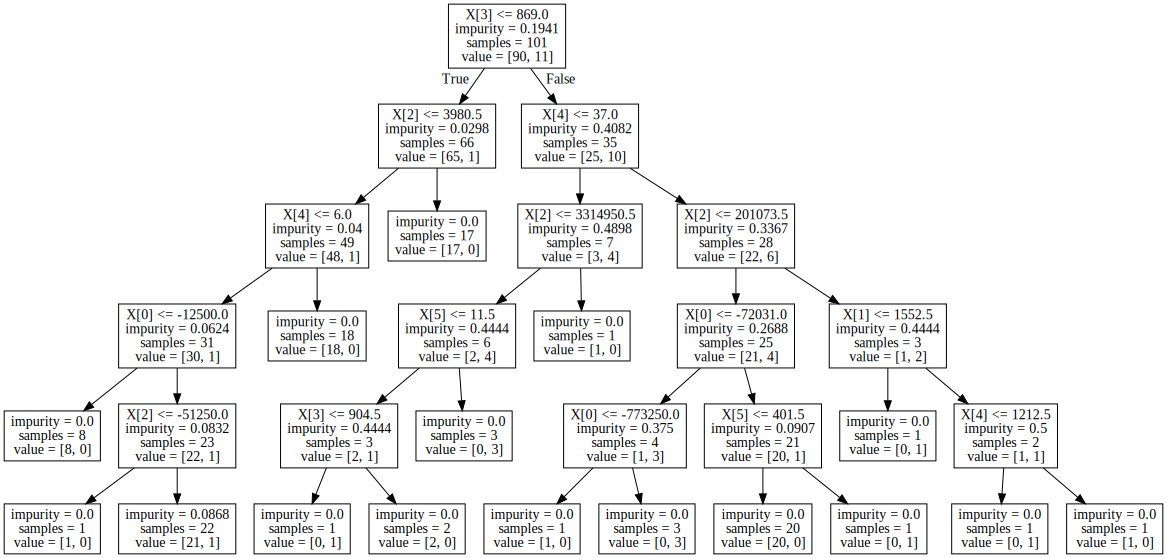

In [9]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1')
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_default.dot")

# Open tree viz and display it
with open("tree_default.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

/Users/scottbrenstuhl/Projects/Data_Analyst_Nanodegree/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


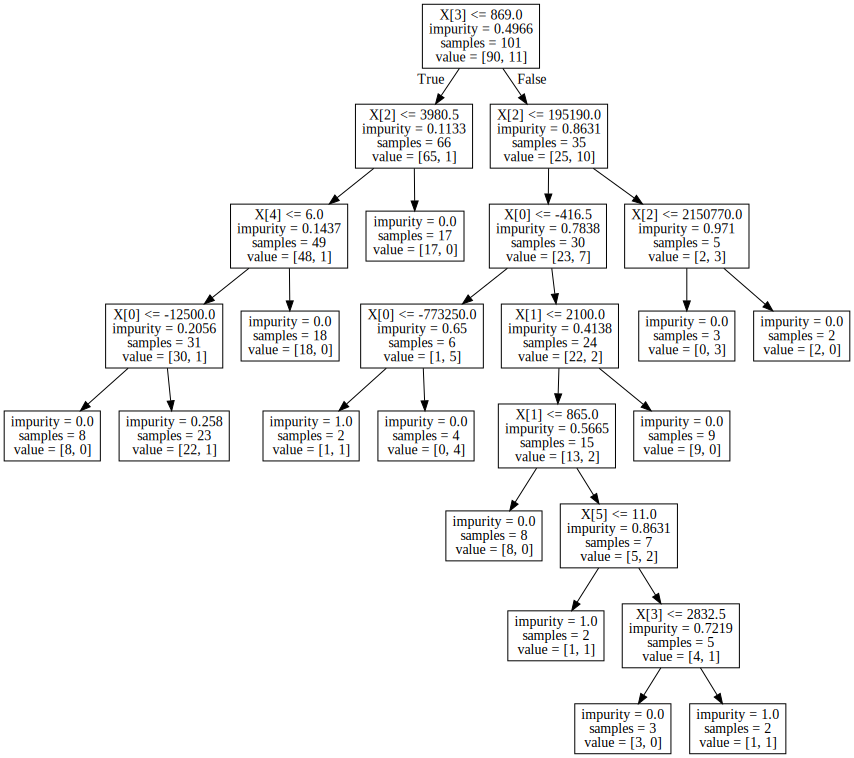

In [4]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 5)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_5.dot")

# Open tree viz and display it
with open("tree_5.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


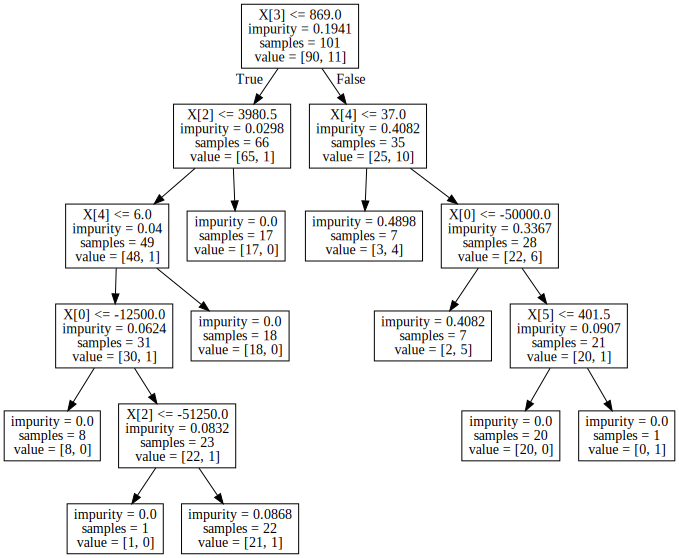

In [5]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 10)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_10.dot")

# Open tree viz and display it
with open("tree_10.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

/Users/scottbrenstuhl/Projects/Data_Analyst_Nanodegree/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 11 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=15.
  % (min_labels, self.n_folds)), Warning)
/Users/scottbrenstuhl/Projects/Data_Analyst_Nanodegree/venv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


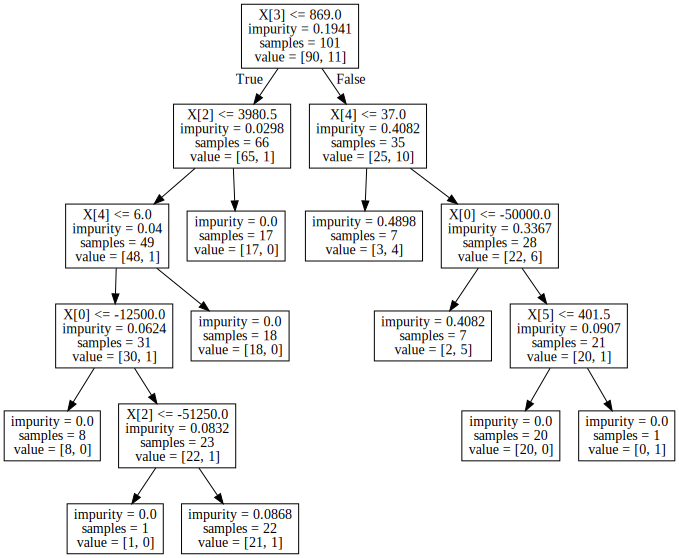

In [6]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 15)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_15.dot")

# Open tree viz and display it
with open("tree_15.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


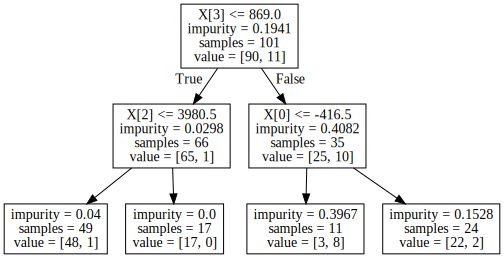

In [10]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 20)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_20.dot")

# Open tree viz and display it
with open("tree_20.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

/Users/scottbrenstuhl/Projects/Data_Analyst_Nanodegree/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 11 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=25.
  % (min_labels, self.n_folds)), Warning)


FEATURE KEY
-----------
X[0] : deferred_income
X[1] : shared_receipt_with_poi
X[2] : deferral_payments
X[3] : to_messages
X[4] : from_messages
X[5] : from_this_person_to_poi


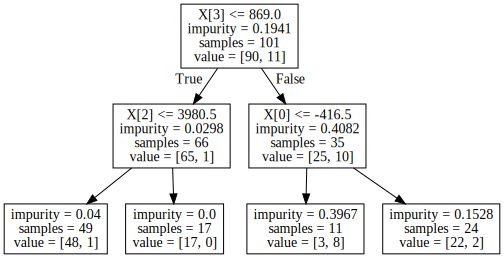

In [8]:
parameters = {'criterion':('gini', 'entropy'),
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':[None,1,2,4],
              'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,4,10,15,20,25]}

# Create the classifier
dt_clf = DecisionTreeClassifier(random_state=1809)

# Grid search all the parameters with the 
# This works really well
clf = GridSearchCV(dt_clf, parameters, scoring = 'f1', cv = 25)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

print "FEATURE KEY"
print "-----------"
for n in range(0,len(features_test.columns)):
    print "X[%s] : %s" % (n, features_test.columns[n])

# Export visualization of the tree
export_graphviz(clf.best_estimator_.tree_, out_file="tree_25.dot")

# Open tree viz and display it
with open("tree_25.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1809, splitter='best')